## Identifying Types of Players to Target for Future Data Collection

## Intro

## Methods & Results

We started by importing libraries for later steps. The last line of code specifies the maximum amount of lines to show if a dataset is printed to increase readability throughout the code.


In [66]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

## Importing and Reading the Data Files in R

Then, we imported the data into the workbook.

In [67]:
player_data <- read.csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
player_data


session_data <- read.csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")
session_data

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


## Tidying data and wrangling session data into player data

The data was tidied by making an extra row in the player dataset named counter and it counted how many times each user logged in to play Minecraft. We counted how many times each player logged in through their hashed ID and joined the row to the player data. This was done so that the counter variable could later on be used as a predictor variable. We also factored the experience column so R would read it as a categorical variable and removed the two N/A columns in addition to any users that had N/A values for the new counter variable.


In [68]:
tidy_player_data <- select(player_data,-individualId, -organizationName) |>
    mutate(experience = as_factor(experience))
tidy_player_data

tidy_session_data <- session_data
tidy_session_data

experience,subscribe,hashedEmail,played_hours,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [69]:
login_counter <- session_data |>
  group_by(hashedEmail) |>
  summarise(counter = n())
login_counter

tidy_counter_data <- tidy_player_data |>
    left_join(login_counter, by = "hashedEmail") |>
    na.omit()
    

hashedEmail,counter
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


## Determining Optimal Neighbours

Next, we split new the tidy player data into a training and testing set through the factored experience variable. We chose 90% of the data for the training set because 125 rows are not that many, and we aimed to prioritize a better training set over a larger testing set. We also set the seed to assure that our results are reproducible.

In [70]:
set.seed(275)

player_split <- initial_split(tidy_counter_data, prop = 0.90, strata = experience)
player_training <- training(player_split)
player_testing <- testing(player_split)


## Creating VFolds and Plot for Optimal Neighbours

We created a workflow to test different numbers of neighbours to find the highest accuracy
in a range of odd numbers from 1-7. We didn't consider higher values for k because the dataset and training set were quite small. The size of the data should be considered when selecting the optimal number of neighbors, so values higher than 7 didn't make much sense to include, as it would likely result in overfitting. Then, we created a workflow and
graphed the output to find the highest point, which was our optimal neighbours.


→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.2554451,5,0.03368730,Preprocessor1_Model1
1,roc_auc,hand_till,0.5219345,5,0.02337378,Preprocessor1_Model1
3,accuracy,multiclass,0.2641408,5,0.02582490,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,roc_auc,hand_till,0.5528429,5,0.02261914,Preprocessor1_Model3
7,accuracy,multiclass,0.2462733,5,0.01901524,Preprocessor1_Model4
7,roc_auc,hand_till,0.5419848,5,0.01904598,Preprocessor1_Model4


[1] 3

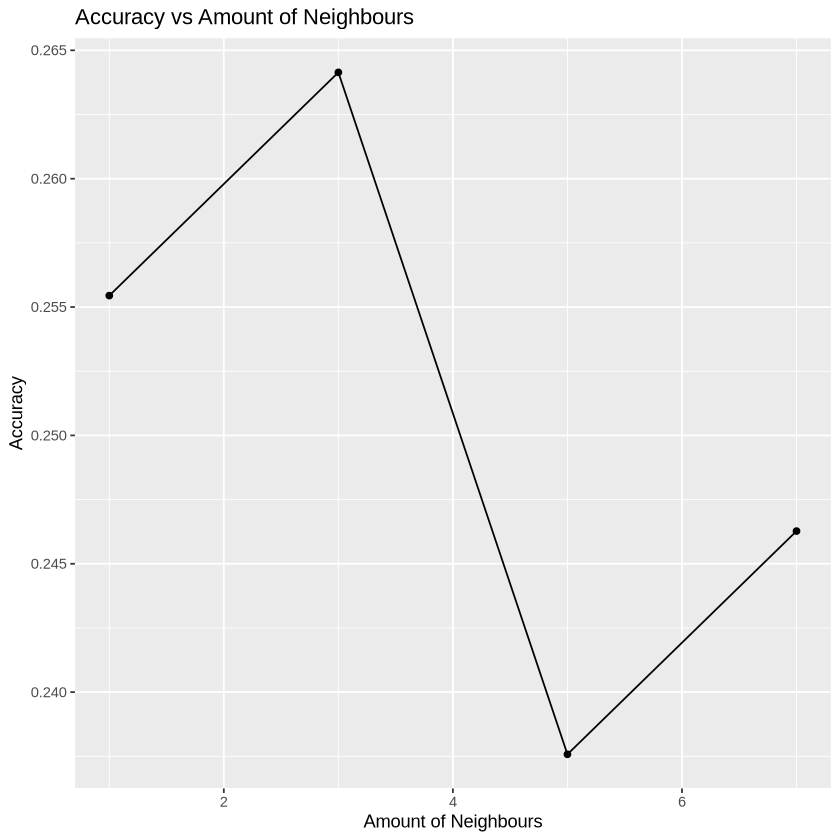

In [71]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

player_recipe <- recipe(experience ~ played_hours + counter, data = player_training) |>
  step_scale(all_predictors())|>
    step_center(all_predictors())

knn_vfold <- vfold_cv(player_training, v = 5, strata = experience)

k_vals <- tibble(neighbors = seq(from = 1, to = 7, by = 2))

knn_results <- workflow() |>
       add_recipe(player_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = knn_vfold, grid = k_vals) |>
       collect_metrics()
knn_results

filtered_results <- filter(knn_results, .metric == "accuracy")

cross_val_plot <- ggplot(filtered_results, aes(y = mean, x=neighbors))+
                geom_point()    +
                geom_line() +
    labs( x= "Amount of Neighbours", y= "Accuracy", title= "Accuracy vs Amount of Neighbours")
cross_val_plot

neighbours_optimal <- arrange(filtered_results, -mean) |>
select(neighbors)|>
    slice(1)|>
    pull()
neighbours_optimal

## Performing Final Classification With Optimal Neighbours

After finding the optimal number, we ran the workflow again with the new information and found our model's accuracy on the testing set. 

In [72]:
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = neighbours_optimal)|>
    set_engine("kknn")|>
    set_mode("classification")

player_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec) |>
  fit(data = player_training)

player_fit

predictions <- player_fit |>
  predict(player_training) |>
  bind_cols(player_training)

player_metrics <- predictions |>
  metrics(truth = experience, estimate = .pred_class) |>
  filter(.metric == "accuracy")
player_metrics

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.7454545
Best kernel: rectangular
Best k: 3

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5454545


## Testing Model

In [73]:
test_set_metrics <- predict(player_fit, player_testing)|>
    bind_cols(player_testing)|>
    metrics(truth = experience, estimate = .pred_class)

## Finding Optimal Players Using Hypothetical Dataset 

Finally, we created a dataset of different combinations of users with high played_hours and counters, then predicted the class of each user in the best player dataset. Next, we counted each level of experience and finally found which experience was predicted the most for these best players to answer our question of which player type to target. The assumption here is that if high contributing observations are most commonly classified at a certain experience level, this level is the most likley to contribute a large amount of data.

In [74]:
best_players <- tibble(played_hours =c(150,202,300,190,100,250, 300), counter=c(200,240,30,70,250,100,300))
best_players

predicted_best<- predict(player_fit, best_players)|>
    bind_cols(best_players)

best_cat <- predicted_best |>
    group_by(.pred_class) |>
    summarize(most = n()) |>
    arrange(desc(most)) |>
    slice(1) |>
    pull(.pred_class)
best_cat

played_hours,counter
<dbl>,<dbl>
150,200
202,240
300,30
⋮,⋮
100,250
250,100
300,300


[1] Regular
Levels: Pro Veteran Amateur Regular Beginner

### Analysis Visualization

We graphed the findings in a scatterplot of unscaled data by joining the two datasets and sorting colour by the experience level for the actual data or predicted experiences for the predicted data. Then, we used colour to seperate the different experience types and shape for the real or predicted data to confirm and visually show the output of the model. We also chnaged the y-axis label, to ensure that the graph is easily understandable.

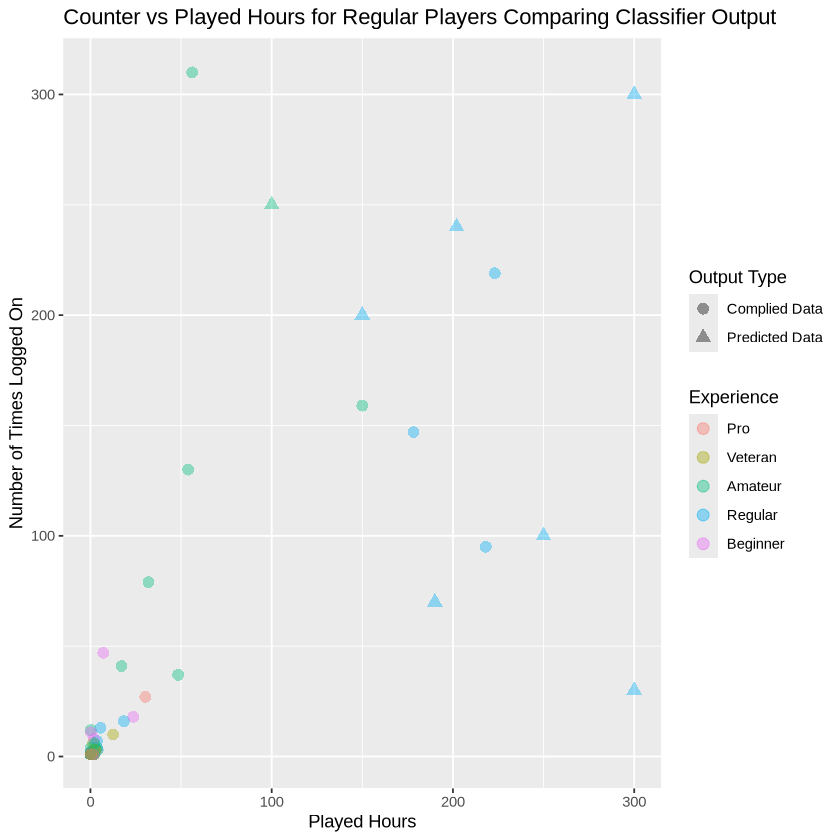

In [77]:
player_training <- tidy_counter_data |>
  mutate(type = "Complied Data")

predicted_best <- predicted_best |>
  mutate(type = "Predicted Data",
         experience = .pred_class)

combined_data <- bind_rows(player_training, predicted_best)

final_graph <-ggplot(combined_data, aes(x = played_hours, y = counter)) +
  geom_point(alpha = 0.4, size =3, aes(color = experience, shape = type)) + 
  labs(
    title = "Counter vs Played Hours for Regular Players Comparing Classifier Output",
    x = "Played Hours",
    y = "Number of Times Logged On",
    color = "Experience",
    shape = "Output Type"
  )


final_graph

## Discussion 